In [61]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [12]:
prediction_40_top = []
with open("prediction_40.txt", "r") as fp:
    lines = fp.readlines()
    for line in lines:
        prediction_40_top.append(int(line.rstrip("\n")))

In [13]:
prediction_40_top

[26,
 15,
 15,
 15,
 15,
 15,
 15,
 29,
 20,
 11,
 29,
 11,
 15,
 12,
 15,
 15,
 15,
 15,
 12,
 15,
 15,
 15,
 15,
 15,
 15,
 31,
 15,
 15,
 15,
 15,
 15,
 12,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 31,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 29,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 25,
 25,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,


In [68]:
prediction_40_prob = []
with open("prediction_40_prob.txt", "r") as fp:
    lines = fp.readlines()
    for line in lines:
        prediction_40_prob.append(float(line.rstrip("\n")))

In [70]:
prediction_40_prob

[0.33008785234060645,
 0.7100837657036331,
 0.5797006393903527,
 0.4081927137800962,
 0.4785861579959149,
 0.4841670261353964,
 0.6583934754081944,
 0.769230268484808,
 0.6319403519666674,
 0.25706176373125583,
 0.37906063243549437,
 0.4447521221747356,
 0.4798086602848795,
 0.25116056313037644,
 0.51493312846187,
 0.5149331254322127,
 0.37518015564433965,
 0.5540148951912953,
 0.44803194002307534,
 0.6441639172367539,
 0.5416045453906798,
 0.3671039812198099,
 0.5132454830189207,
 0.36900766237123694,
 0.5992647651079384,
 0.25520454611795784,
 0.5431138965582663,
 0.6014258822439126,
 0.5748728849676079,
 0.6026726059320108,
 0.577406890553539,
 0.4471011835498368,
 0.5332546186831604,
 0.5618134612002521,
 0.3941444679719636,
 0.5855223307440702,
 0.4988166962867455,
 0.5146507187517737,
 0.5990290723920955,
 0.6584827035825659,
 0.4541189341688921,
 0.6397360678795851,
 0.6881839907403269,
 0.2784570667763445,
 0.3633687436946176,
 0.4930648590552007,
 0.5585423322694778,
 0.394532

In [18]:
percentages = [0] * 40
for i in range(len(prediction_40_top)):
    percentages[prediction_40_top[i]] += 1

In [76]:
dict_mols = {}
for i in range(len(prediction_40_top)):
    if prediction_40_top[i] not in dict_mols.keys():
        dict_mols[prediction_40_top[i]] = []
    dict_mols[prediction_40_top[i]].append((i, prediction_40_prob[i]))

In [77]:
percentages[39]

338

In [78]:
len(dict_mols[39])

338

In [81]:
for key in dict_mols.keys():
    dict_mols[key] = sorted(dict_mols[key], key=lambda x: x[1], reverse=True)

In [84]:
dict_mols[0][:15]

[(3397, 0.8239577971375344),
 (12607, 0.808571071786384),
 (12793, 0.7879069516525247),
 (3453, 0.7788502246181471),
 (3457, 0.7708520997954941),
 (6501, 0.7673973197260883),
 (6556, 0.7673973197260883),
 (3195, 0.7673973046989332),
 (3398, 0.7673972549163613),
 (3413, 0.7673972549163613),
 (3414, 0.7673972549163613),
 (13847, 0.7631140653568249),
 (2134, 0.7580852313878401),
 (3420, 0.7487441564021858),
 (1825, 0.7485059372812242)]

In [86]:
labels = pd.read_csv('./vectos_prop_20k/meltPt_prop2.csv')
labels.head()

,Unnamed: 0,smiles,mf,mw,em,logP,logS,psa,donorCount,centerCount,rotatableBondCount,acceptorCount,mpC
0,0,B(C)(C)Br ...,C2H6BBr,120.78464,119.974591,1.3934,1.781,0.000000,0,0,0,0,-129.0
1,1,B(C)(O)O ...,CH5O2B,59.85970,60.038260,0.6967,1.820,40.459999,2,0,0,2,92.0
2,2,B(C1CC1)(O)O ...,C3H7O2B,85.89758,86.053910,0.6840,1.470,40.459999,2,0,1,2,93.0
3,3,B(C=CCC(C)C)(O)O ...,C6H13O2B,127.97822,128.100860,1.9440,0.927,40.459999,2,0,3,2,101.0
4,4,B(C=CCCC)(O)O ...,C5H11O2B,113.95134,114.085210,1.7257,1.087,40.459999,2,0,3,2,80.0


In [41]:
aa_smis = labels['smiles'].tolist()[:10]
aa_codes = labels['mf'].tolist()[:10]

In [87]:
labels.set_index('smiles', inplace=True)
labels.drop(columns=["Unnamed: 0"], inplace=True)

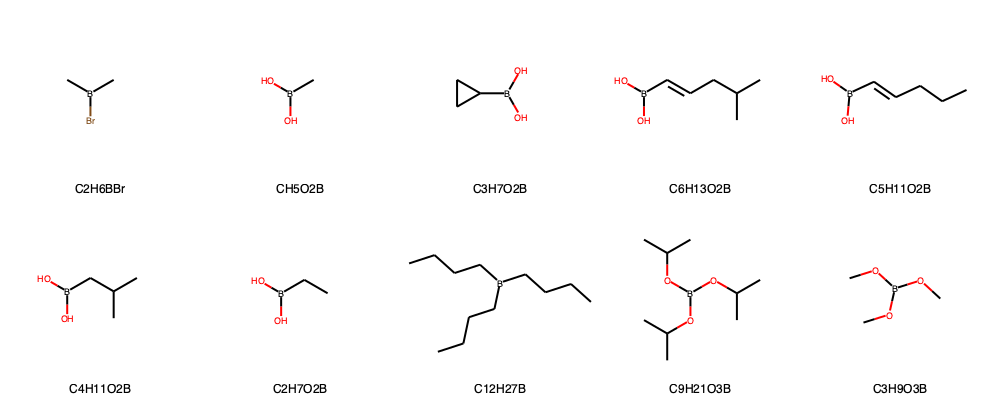

In [43]:
aas = [Chem.MolFromSmiles(x) for x in aa_smis]
Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False, legends=aa_codes)

In [44]:
properties = labels.columns.tolist()

### Topic 0

In [88]:
sample = [val[0] for val in dict_mols[0][:15]]
df = labels.iloc[sample]
df.head()

,mf,mw,em,logP,logS,psa,donorCount,centerCount,rotatableBondCount,acceptorCount,mpC
smiles,,,,,,,,,,,
CC2(C)C1C=CC2(C)CC1,C10H16,136.23704,136.125200,2.6123,-2.572,0.00,0,2,0,0,113.0
O=C1C(=C)C2CCC1(C)C2(C)C,C11H16O,164.24704,164.120115,2.4224,-2.515,17.07,0,2,0,1,45.0
O=C1C=CC2CCC1(C)C2(C)C,C11H16O,164.24704,164.120115,2.2459,-2.494,17.07,0,2,0,1,174.0
CC4(C)CCC5(C)CCC3(C)C(=CCC2C3(C)CCC1C2(C)CCC(O)C1(C)C)C5C4,C30H50O,426.72600,426.386165,7.3406,-6.653,20.23,1,8,0,1,197.0
CC5(C)CC3C(C)(CC=C2C4(C)CCC1C(C)(CCC(O)C1(C)C)C4CCC23C)CC5,C30H50O,426.72600,426.386165,7.3406,-6.653,20.23,1,8,0,1,283.5


In [89]:
aa_smis = df.index.tolist()
aa_codes = df['mf'].tolist()
df.drop(columns=["mf"], inplace=True)

/Users/yixuanli/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


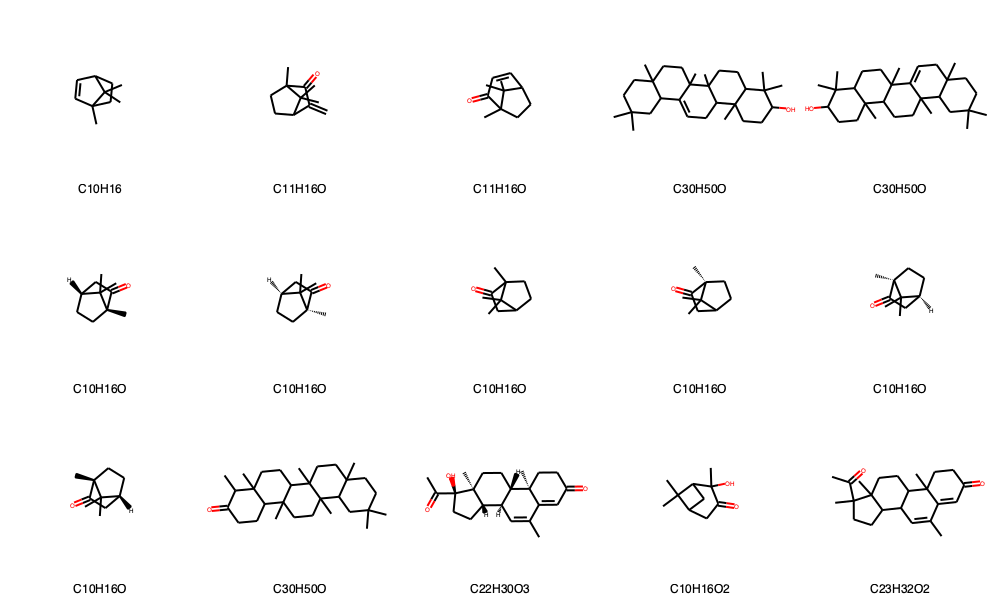

In [90]:
aas = [Chem.MolFromSmiles(x) for x in aa_smis]
Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False, legends=aa_codes)

In [91]:
variances = []
hists = []
bin_edges_list = []
for col in properties:
    variances.append(df[col].std())

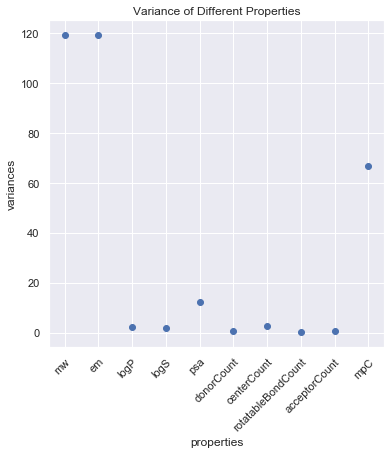

In [92]:
fig, ax = plt.subplots(figsize = (6,6))
plt.scatter(properties, variances)
ax.set_xlabel('properties')
ax.set_ylabel('variances')
ax.set_xticks(np.arange(len(properties)))
ax.set_xticklabels(properties)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title('Variance of Different Properties')
plt.show()

/Users/yixuanli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


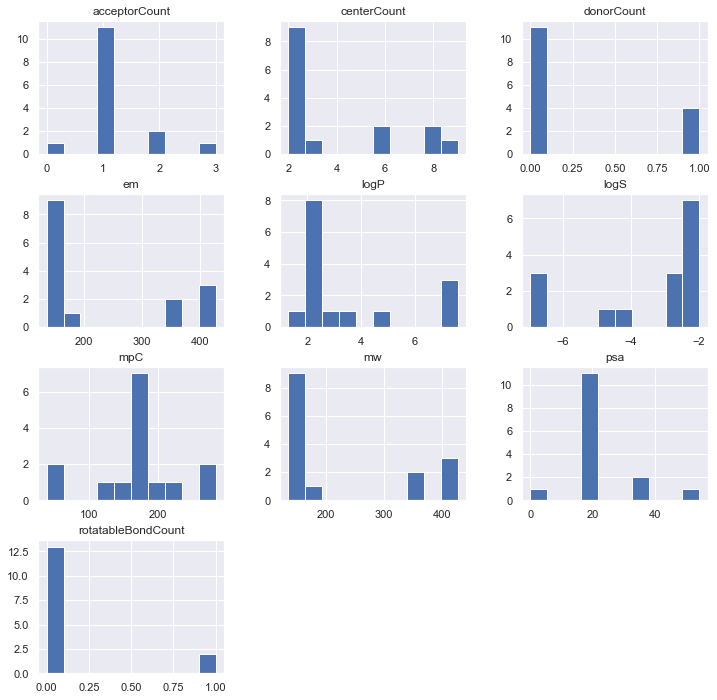

In [93]:
fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
ax = fig.gca()
df.hist(ax=ax)
plt.show()

### Topic 5

In [100]:
sample = [val[0] for val in dict_mols[5][:15]]
df = labels.iloc[sample]
df.head()

,mf,mw,em,logP,logS,psa,donorCount,centerCount,rotatableBondCount,acceptorCount,mpC
smiles,,,,,,,,,,,
c1ccc(cc1)CP(Cc2ccccc2)Cc3ccccc3,C21H21P,304.37174,304.138087,4.8711,-6.569,13.590000,0,0,6,0,96.0
CSCc1ccccc1,C8H10S,138.23340,138.050320,2.1136,-2.708,25.299999,0,0,2,0,-30.0
Cc1ccccc1P(c2ccccc2)c3ccccc3,C19H17P,276.31798,276.106787,5.3302,-5.395,13.590000,0,0,3,0,72.0
c1ccc(cc1)[Si](c2ccccc2)(c3ccccc3)c4ccccc4,C24H20Si,336.50880,336.133427,5.5320,-4.150,0.000000,0,0,4,0,237.0
c1ccccc1[Si](c2ccccc2)(c3ccccc3)c4ccccc4,C24H20Si,336.50880,336.133427,5.5320,-4.150,0.000000,0,0,4,0,236.5


In [101]:
aa_smis = df.index.tolist()
aa_codes = df['mf'].tolist()
df.drop(columns=["mf"], inplace=True)

/Users/yixuanli/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


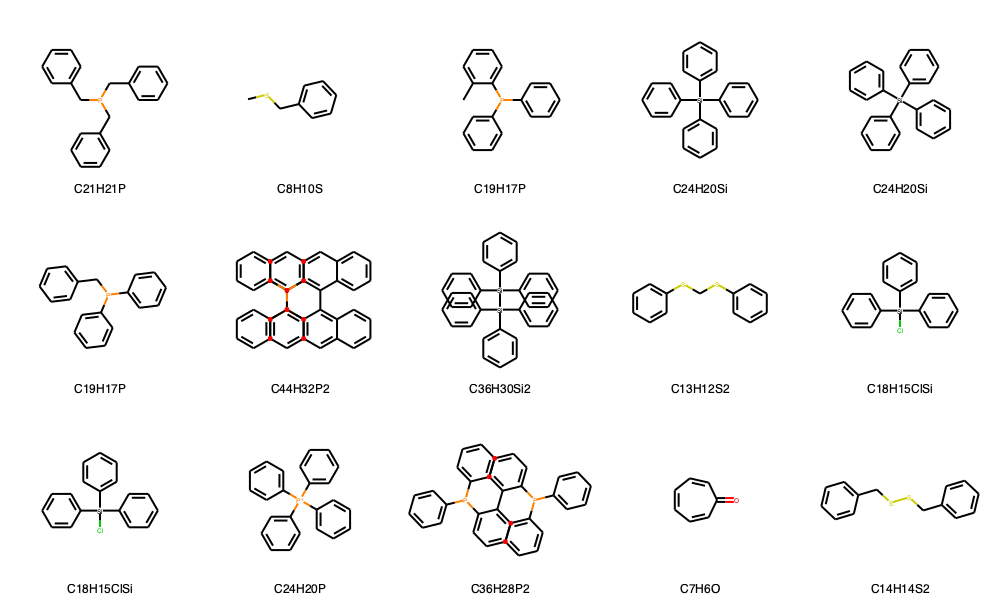

In [102]:
aas = [Chem.MolFromSmiles(x) for x in aa_smis]
Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False, legends=aa_codes)

In [103]:
variances = []
hists = []
bin_edges_list = []
for col in properties:
    variances.append(df[col].std())

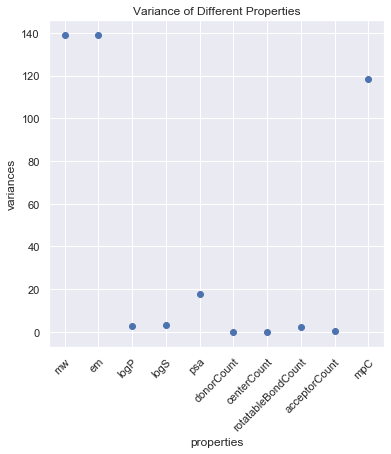

In [104]:
fig, ax = plt.subplots(figsize = (6,6))
plt.scatter(properties, variances)
ax.set_xlabel('properties')
ax.set_ylabel('variances')
ax.set_xticks(np.arange(len(properties)))
ax.set_xticklabels(properties)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title('Variance of Different Properties')
plt.show()

/Users/yixuanli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


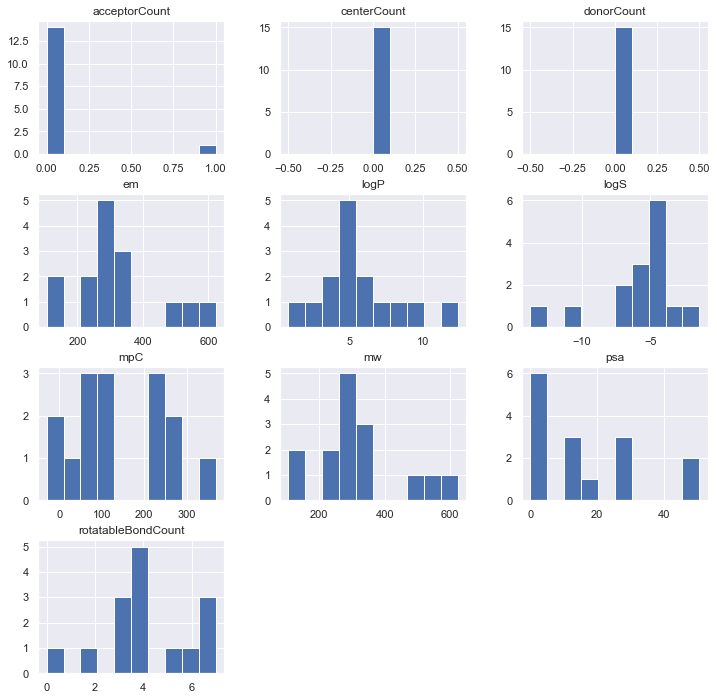

In [105]:
fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
ax = fig.gca()
df.hist(ax=ax)
plt.show()

### Topic 10

In [94]:
sample = [val[0] for val in dict_mols[10][:15]]
df = labels.iloc[sample]
df.head()

,mf,mw,em,logP,logS,psa,donorCount,centerCount,rotatableBondCount,acceptorCount,mpC
smiles,,,,,,,,,,,
OC1CCCCCCCCCCCCCC1,C15H30O,226.40220,226.229665,5.7942,-4.181,20.23,1,0,0,1,80.5
C1CCCCCC(CCCCC1)O,C12H24O,184.32156,184.182715,4.4310,-3.371,20.23,1,0,0,1,78.0
C(CN1CCCCC1)N2CCCCC2,C12H24N2,196.33656,196.193948,1.8302,-1.142,6.48,0,0,3,2,-0.5
C1CCCCCCCC1,C9H18,126.24192,126.140850,4.0896,-2.960,0.00,0,0,0,0,11.0
C1CCCCCCCCCC1,C11H22,154.29568,154.172150,4.9984,-3.500,0.00,0,0,0,0,-7.0


In [95]:
aa_smis = df.index.tolist()
aa_codes = df['mf'].tolist()
df.drop(columns=["mf"], inplace=True)

/Users/yixuanli/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


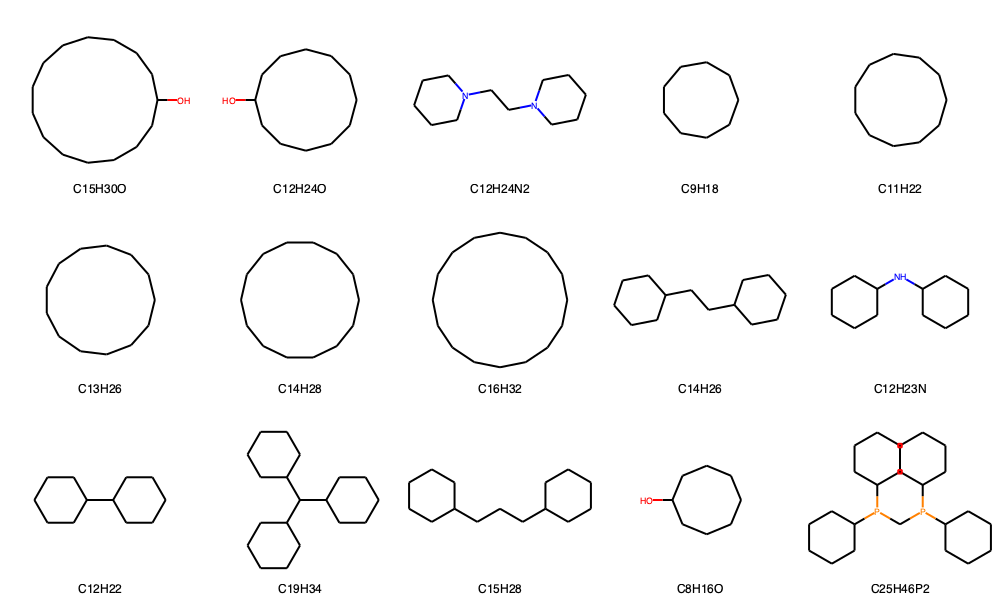

In [96]:
aas = [Chem.MolFromSmiles(x) for x in aa_smis]
Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False, legends=aa_codes)

In [97]:
variances = []
hists = []
bin_edges_list = []
for col in properties:
    variances.append(df[col].std())

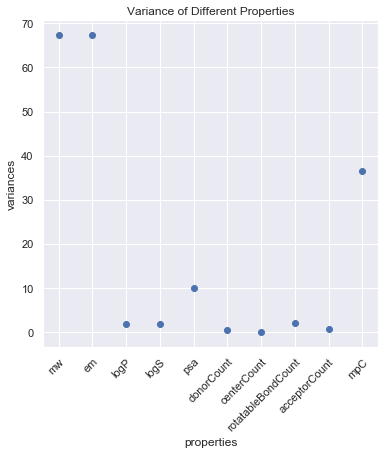

In [98]:
fig, ax = plt.subplots(figsize = (6,6))
plt.scatter(properties, variances)
ax.set_xlabel('properties')
ax.set_ylabel('variances')
ax.set_xticks(np.arange(len(properties)))
ax.set_xticklabels(properties)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title('Variance of Different Properties')
plt.show()

/Users/yixuanli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


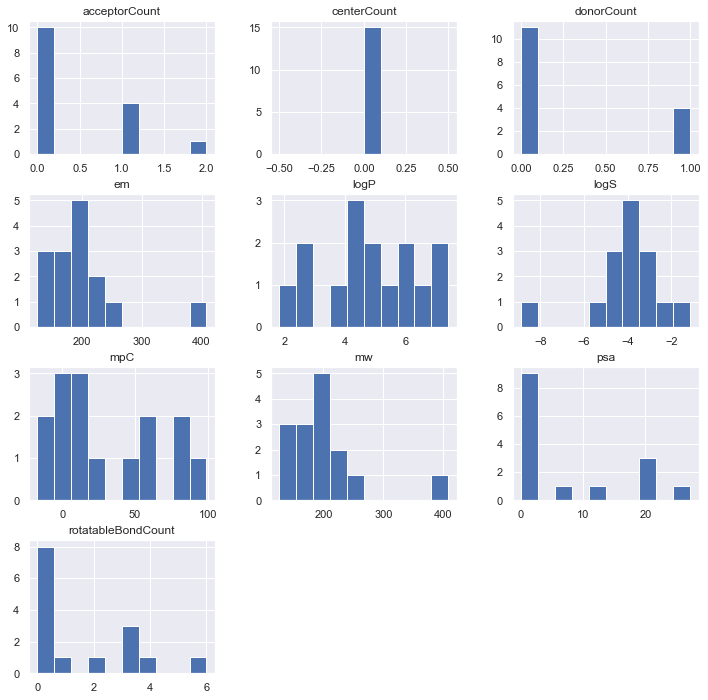

In [99]:
fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
ax = fig.gca()
df.hist(ax=ax)
plt.show()

### Topic 29

In [106]:
sample = [val[0] for val in dict_mols[29][:15]]
df = labels.iloc[sample]
df.head()

,mf,mw,em,logP,logS,psa,donorCount,centerCount,rotatableBondCount,acceptorCount,mpC
smiles,,,,,,,,,,,
CCCCCCCCCCCCCCBr,C14H29Br,277.28826,276.145261,6.7903,-4.767,0.0,0,0,12,0,5.0
BrCCCCCCCCCCCCCC,C14H29Br,277.28826,276.145261,6.7903,-4.767,0.0,0,0,12,0,5.6
CCCCCCCCCCCCCCCBr,C15H31Br,291.31514,290.160911,7.2447,-5.037,0.0,0,0,13,0,19.0
BrCCCCCCCCCCCCCCC,C15H31Br,291.31514,290.160911,7.2447,-5.037,0.0,0,0,13,0,19.0
CCCCCCCCCCCCCCCCBr,C16H33Br,305.34202,304.176561,7.6991,-5.307,0.0,0,0,14,0,17.0


In [107]:
aa_smis = df.index.tolist()
aa_codes = df['mf'].tolist()
df.drop(columns=["mf"], inplace=True)

/Users/yixuanli/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


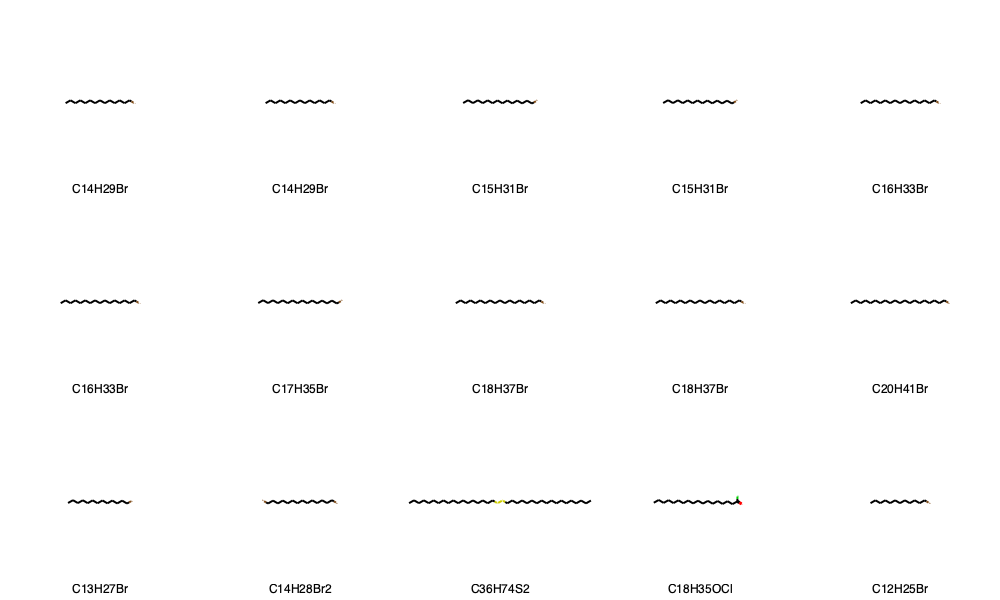

In [108]:
aas = [Chem.MolFromSmiles(x) for x in aa_smis]
Draw.MolsToGridImage(aas, molsPerRow=5, useSVG=False, legends=aa_codes)

In [109]:
variances = []
hists = []
bin_edges_list = []
for col in properties:
    variances.append(df[col].std())

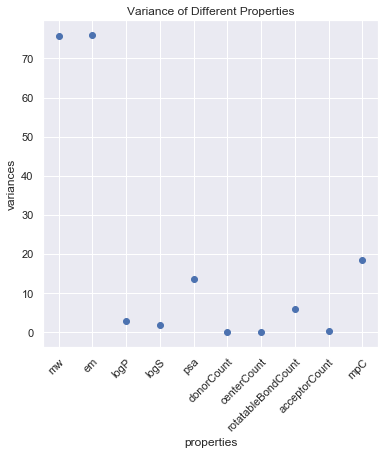

In [110]:
fig, ax = plt.subplots(figsize = (6,6))
plt.scatter(properties, variances)
ax.set_xlabel('properties')
ax.set_ylabel('variances')
ax.set_xticks(np.arange(len(properties)))
ax.set_xticklabels(properties)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_title('Variance of Different Properties')
plt.show()

/Users/yixuanli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


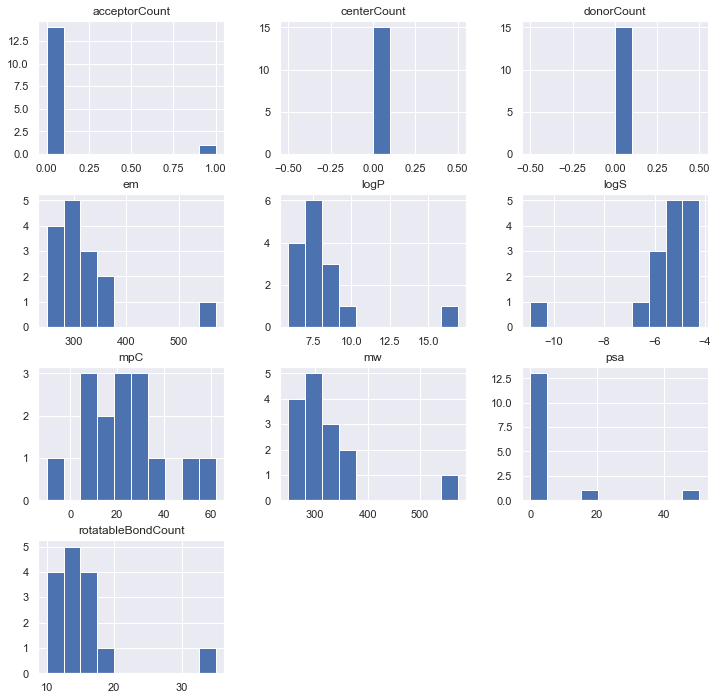

In [111]:
fig = plt.figure(figsize = (12,12))
fig.subplots_adjust(hspace=0.6, wspace=0.6)
ax = fig.gca()
df.hist(ax=ax)
plt.show()